<a href="https://colab.research.google.com/github/holyarmsBR/DS-Projects/blob/master/Analisando_dados_do_Airbnb_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando dados de hospedagem no Hawaii

**Ah! o Hawaii!!!!** Lugar apaixonante que tive o prazer de conhecer no final de 2018, época em que o Medina conquistou o Pipe Master e o Jessé, a tríplice coroa.

Como surfista (amador) e amante do esporte, resolvi, como primeiro trabalho no campo de Data Science, entender um pouco como funciona o mercado de hospedagem desse lugar tão lindo.

O Hawaii (hoje um estado dos EUA) é um arquipélago no meio do oceano pacífico composto por 132 ilhas (isso mesmo!!). Contudo são 8 as ilhas principais:
* Oahu
* Big Island
* Maui
* Kauai
* Molokay
* Lanai
* Niihau
* Kahoolawe


Para o presente estudo (utilizado para o aprendizado de data science e para minha curiosidade...rsrs) utilizei os dados do [Airbnb](https://www.airbnb.com.br/). Pelo aplicativo é possivel que qualquer um ofereça sua casa a quem deseje um local para passar a noite, um final de semana, um mês... e por aí vai.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes ao Hawaii e ver quais insights podem ser extraídos a partir de dados brutos.**

##1- Obtenção dos dados##

Os dados que serão utilizados foram obtidos através do [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise incial, utilizarei o seguinte arquivo:
* listings.csv - Dados simplificados referentes ao Hawaii.

In [0]:
#Importando os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#importando o arquivo csv

df = pd.read_csv("http://data.insideairbnb.com/united-states/hi/hawaii/2020-05-11/visualisations/listings.csv")

##2- Análise dos dados##

Primeiramente, vamos entender como os dados estão distribuídos:

In [0]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04095,-155.43251,Entire home/apt,85,2,42,2020-03-22,0.48,2,365
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,110,30,10,2020-03-01,0.09,6,341
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43119,-155.88079,Entire home/apt,92,5,168,2020-03-18,1.35,3,358
3,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56413,-155.96347,Entire home/apt,299,6,20,2020-03-22,0.25,3,243
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88305,-159.47372,Entire home/apt,92,3,138,2020-03-16,1.03,1,148


###2.1- Compreendendo as variáveis###

O primeiro passo é entender que tipo de informação cada variável quer nos passar. Para isso foi desenvolvida a lista abaixo:

**Dícionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

###2.2- Nos familiarizando com os dados###

Neste momento, vamos verificar quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui, bem como quais os tipos das variáveis de cada coluna.


Vale lembrar que como estou inicindo neste mundo, este dataset que baixei é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa (listings.csv.gz).

Mais pra frente eu crio coragem e trabalho com a base mais "robusta"... rsrs

In [0]:
#Identificar o volume de dados do DataFrame

print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {} \n" .format(df.shape[1]))

#Verificar as 5 primeiras entradas do Dataset

display (df.dtypes)

Entradas: 	 22947
Variáveis: 	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Conforme podemos perceber, o DataFrame conta com 16 variáveis (distribuídas por colunas) e 22.947 observações (linhas). Além disso, tem seus tipos encontram-se descritos acima.

Com essas informações, podemos "entender melhor" nosso conjunto de dados. Dados do tipo **inteiros** (int64) e **float**(float64) nos permitem fazer diversas inferências estatísticas através da análise de médias, percentis, desvios-padrão e por aí vai.

O tipo **object** se refere a um objeto do python **string**. Algumas vezes é necessário que esse tipo de dado seja transformado caso queiramos trabalhar com eles.

A título de exemplo, observem a variável **last_review**. na verdade, ela demonstra a data da última avaliação. Logo, caso eu quisesse trabalhar com datas, esse conjunto de dados teria que ser transformado.



### 2.3- verificando a qualidade dos dados###

A credibilidade de sua análise está diretamente ligada a qualidade dos dados trabalhados. Não há como iniciar suas inferências e gerar resultados confiáveis sem vefificar minimamente algumas "inconsistências" que podem lhe levar ao erro.

Neste primeiro trabalho, vamos analisar os seguintes pontos, que poderiam prejudicar nossa análise:
* Valores ausentes; e
* Presença de *Outliers*.


####2.3.1 - Valores ausentes###

Valores ausentes podem prejudicar sobremaneira qualquer análise realizada. Vamos observar como possíveis ausências de informações estão dispostas no nosso DataFrame:


In [0]:
#Ordenando as variáveis em ordem decrescente de valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.206824
last_review                       0.206824
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

O código acima traz o percentual, por ordem decrescente, de itens faltantes por variável.

Podemos observar que faltam em torno de 20% das variáveis **reviews_per_month** e **last_review**. Trabalhar com elas ou não vai depender do tamanho da amostra que você possui. Como tenho 22.947 observações, ainda me sobraria uma quantidade de dados interessante para trabalhar de forma estatística. Contudo, essa é uma análise ainda superficial, pois não se sabe se os dados faltantes são concentrados, por exemplo. Desta forma, não irei utilizá-las neste notebook.

As demais variáveis estão completas.

####2.3.2- Presença de *Outliers*####

A presença de *Outliers* (grosso modo, aquelas observações que distoam bastante, quantitativamente, do conjunto de observações) tendem a prejudicar significativamente qualquer inferência estatística realizada, trazendo viés aos resultados obtidos.

Desta forma, esses valores devem ser expurgados da base de dados.

Contudo, vamos, primeiramente, como nossas variáveis estão distribuídas:

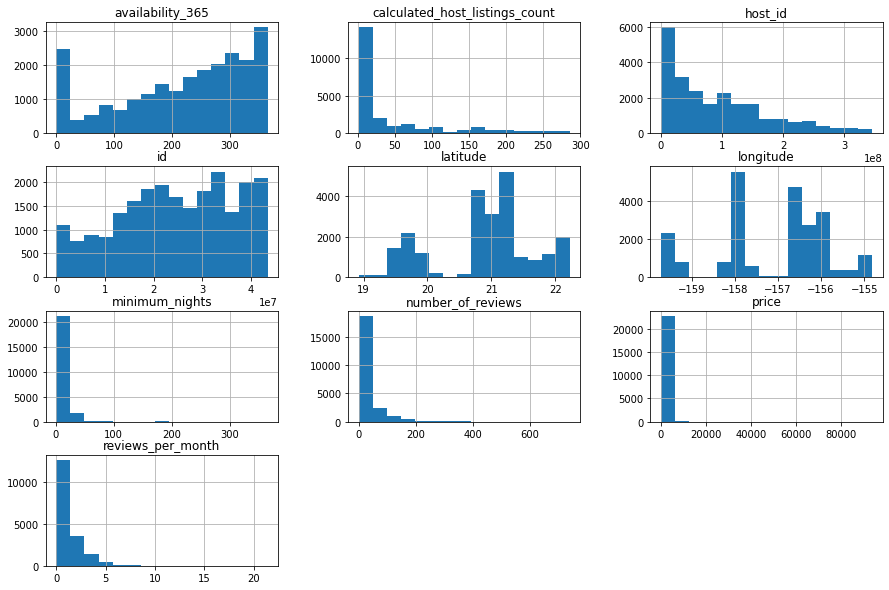

In [0]:
#Plotando o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

À primeira vista, já podemos verificar alguns pontos interessantes. Contudo, de cara percebemos também algumas informações que "fogem do comum".

Vejam, por exemplo, as variáveis **minimun_nights** e **price**. Será que, para alugar uma das ofertas, você seria obrigado a ficar no mínimo mais de 300 noites e pagar uma diária de 80 mil dólares?

Claramente há indícios fortes da presença de *outliers* que precisam ser excluídos para que possamos ter maior confiabilidade em nossas análises.

Primeiramente, vamos confirmar tais indícios verificando as informações estatísticas:

In [0]:
#Ver resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365',]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22947.000000,22947.000000,22947.000000,18201.000000,22947.000000,22947.000000
mean,368.614634,5.547218,28.146860,1.223906,43.391075,217.754129
std,1044.316977,11.245700,49.331837,1.356757,68.248845,112.708917
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,130.000000,1.000000,1.000000,0.270000,2.000000,141.000000
50%,204.000000,3.000000,8.000000,0.720000,7.000000,244.000000
75%,350.000000,5.000000,34.000000,1.760000,58.000000,312.000000
max,94016.000000,365.000000,739.000000,21.410000,286.000000,365.000000


Diante das informações estatísticas acima expostas, podemos afirmar:
* A variável *price* possui 75% do valor abaixo de 350 e seu valor máximo é de 94.016; e
* A quantidade mínima de noites é igual ao número de dias do ano.

Vamos agora, atraves do Boxplot, analisar essa dispersão:


**Boxplot para minimum_night**:

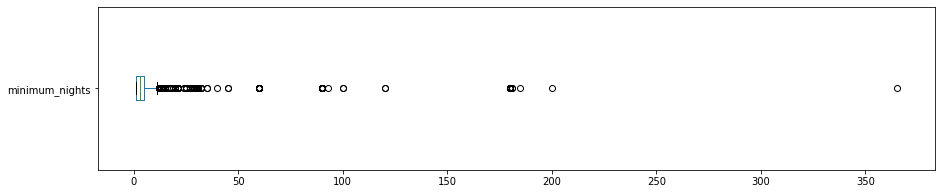

Valores para minimum_nights acima de 30 dias
193 entradas
0.8411%


In [0]:
#minimum_nights boxplot

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Ver quantidade de valores acima de 30 dias para minimum_nights

print("Valores para minimum_nights acima de 30 dias")
print("{} entradas" .format(len(df[df.minimum_nights > 30])))
print("{:.4f}%" .format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

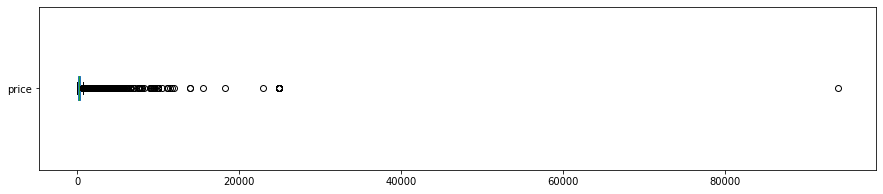

Valores para price acima de 1500
643 entradas
2.8021%


In [0]:
#price boxplot

df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Ver quantidade de valores acima de 1500 para price

print("Valores para price acima de 1500")
print("{} entradas" .format(len(df[df.price > 1500])))
print("{:.4f}%" .format((len(df[df.price > 1500]) / df.shape[0])*100))

Após identificação dos *outliers* nas variáveis **price** e **minimum_nights**, vamos retirá-los do Dataframe e plotar novamente os histogramas:

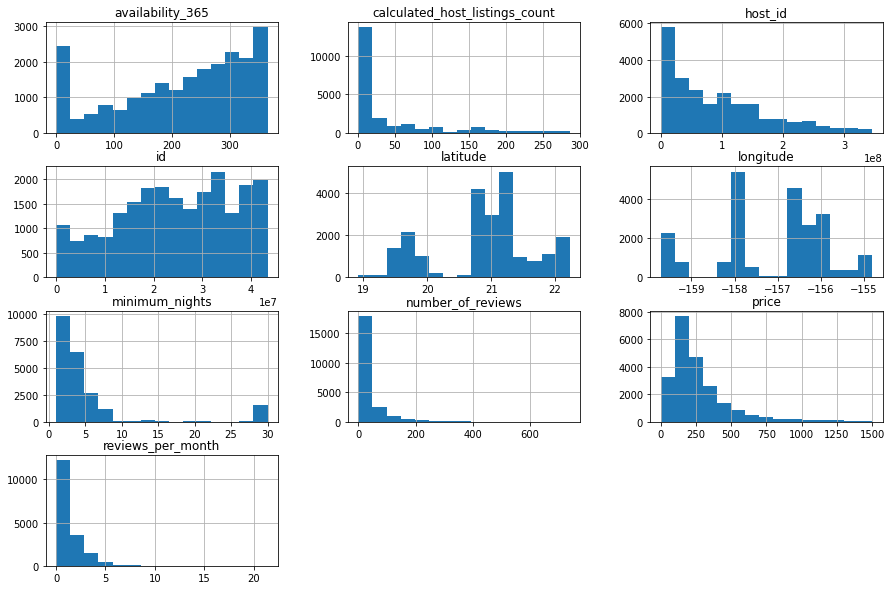

In [0]:
#remover outliers, criando um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#plotar histogramas do DataFrame sem os outliers

df_clean.hist(bins=15, figsize=(15,10));

###2.4- Observando a correlação entre as variáveis###

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

*Criar uma matriz de correlação
*Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [0]:
#criar matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.062323,-0.263807,-0.301468,0.196410,0.007767
minimum_nights,-0.062323,1.000000,-0.038307,-0.085963,-0.098418,-0.041810
number_of_reviews,-0.263807,-0.038307,1.000000,0.725927,-0.264467,0.059694
reviews_per_month,-0.301468,-0.085963,0.725927,1.000000,-0.301650,-0.000409
calculated_host_listings_count,0.196410,-0.098418,-0.264467,-0.301650,1.000000,0.104270
availability_365,0.007767,-0.041810,0.059694,-0.000409,0.104270,1.000000


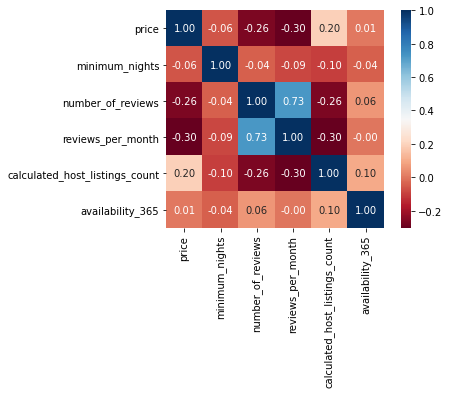

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

###2.5- Tipo de imóvel mais alugado no Hawaii###

A coluna da variável **room_type** indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método **value_counts()**.

In [0]:
#Mostrar quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    19585
Private room        2218
Hotel room           213
Shared room          100
Name: room_type, dtype: int64

In [0]:
#mostrar percentual para cada tipo de imóvel disonpível sobre o total
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.885558
Private room       0.100289
Hotel room         0.009631
Shared room        0.004522
Name: room_type, dtype: float64

###2.6- Local onde a locação é mais cara

Uma maneira de se verificar uma variável em função da outra é usando **groupby()**. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False) [:10]

neighbourhood
Koloa-Poipu          397.044625
Lahaina              382.776662
South Kohala         368.021097
Ewa                  366.558195
North Shore Kauai    313.513085
East Honolulu        307.932099
Kihei-Makena         300.163271
Hana                 296.069444
Koolaupoko           295.867784
Koolauloa            293.029056
Name: price, dtype: float64

In [0]:
df_clean.neighbourhood.value_counts() [:10]

Primary Urban Center    4421
Kihei-Makena            3632
Lahaina                 3188
North Kona              2039
North Shore Kauai       1261
Koloa-Poipu              986
Puna                     952
South Kohala             948
Kapaa-Wailua             553
Koolaupoko               537
Name: neighbourhood, dtype: int64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

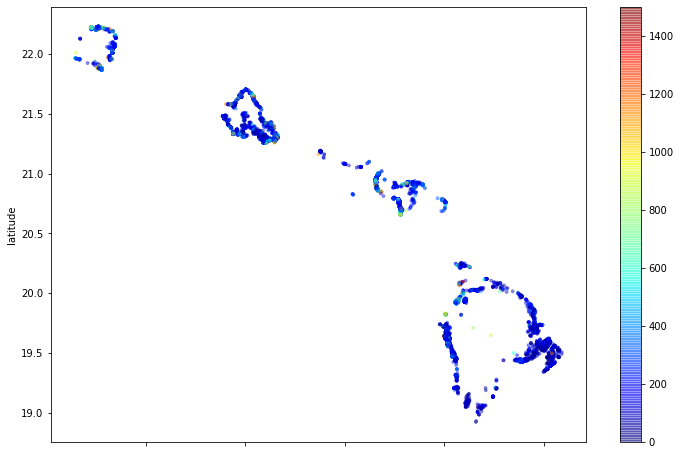

In [0]:
#Plotar imagem pela latitude e longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

##3- Conclusões##

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.